## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [46]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [47]:
train, test = keras.datasets.cifar10.load_data()

In [48]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [49]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [50]:

def build_mlp(
    input_shape, 
    regularizer,
    acti="relu", 
    class_num=10, 
    unitArray=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)

    for idx, unit in enumerate(unitArray): 
        if idx == 0:
            x = keras.layers.Dense(units=unit, activation=acti, kernel_regularizer=regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation=acti, kernel_regularizer=regularizer)(x)

    result = keras.layers.Dense(units=class_num, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[result])

    return model


In [51]:
"""Code Here
設定超參數
"""
LR = 0.001
BATCH_SIZE = 256
EPOCH = 50

adam = keras.optimizers.Adam(lr=LR)

In [52]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

regularizerArray = [keras.regularizers.l1, keras.regularizers.l2]

for idx, regularizer in enumerate(regularizerArray):

    
    if idx == 0:
        keras.backend.clear_session()
        model = build_mlp(x_train.shape[1:], regularizer(1e-4))
        model.compile(
            optimizer=adam,
            loss="categorical_crossentropy",
            metrics=["accuracy"]
        )

        model.fit(
            x_train,
            y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            validation_data=(x_test, y_test)
        )
    else:
        keras.backend.clear_session()
        model = build_mlp(x_train.shape[1:], regularizer(1e-4))
        model.compile(
            optimizer=adam,
            loss="categorical_crossentropy",
            metrics=["accuracy"]
        )

        model.fit(
            x_train,
            y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            validation_data=(x_test, y_test)
        )

    results[f"{idx}"] = {
        "acc":model.history.history["accuracy"],
        "val_acc":model.history.history["val_accuracy"],
        "loss":model.history.history["loss"],
        "val_loss":model.history.history["val_loss"]
    }
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 83us/step - loss: 3.6543 - accuracy: 0.2805 - val_loss: 2.6895 - val_accuracy: 0.2846
Epoch 2/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.3230 - accuracy: 0.3555 - val_loss: 2.2201 - val_accuracy: 0.3397
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1004 - accuracy: 0.3792 - val_loss: 2.0532 - val_accuracy: 0.3891
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9966 - accuracy: 0.3983 - val_loss: 2.0035 - val_accuracy: 0.3809
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.9297 - accuracy: 0.4090 - val_loss: 1.9288 - val_accuracy: 0.4132
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8897 - accuracy: 0.4165 - val_loss: 1.8696 - val_accuracy: 0.4182
Epoch 7/50
50000/50000 [==============================] - 4s 75us/st

No handles with labels found to put in legend.


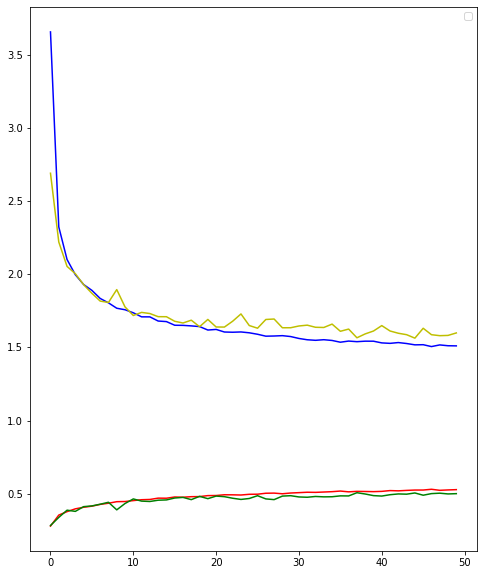

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
cArray = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,10))
for idx, name in enumerate(results["0"].keys()):
    plt.plot(
        range(50),
        results["0"][name],
        "-",
        c=cArray[idx]
    )
    
plt.legend()
plt.show()

